In [1]:
from import_python import  set_up_working_directory, data_basic_details
from import_spark import  spark_spin_up_session,spark_read_images_from_path, spark_return_image_attribute
from image_processing import plot_images, load_image,  img_path,  resnet_model, get_embedding

In [2]:
#load all libs 
import os
import time
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from sklearn.metrics.pairwise import pairwise_distances
#customized libs 
from image_processing import  plot_images, load_image
 
DATASET_PATH = "e:/dev/Kaggle/fashion/"
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=8000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
    
def get_recommender(image_idx, df, max_rec = 3):
    DATASET_PATH = "e:/dev/Kaggle/fashion/"
    os.chdir(DATASET_PATH)
    
    #res_model = load_model('my_model.h5')

    #load embeddings from df
    df_embs= np.loadtxt('df_embs.txt', dtype=int)
    
    #find simialrities based on cosinefunction
    cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
    indices = pd.Series(range(len(df)), index=df.index)
    sim_idx    = indices[image_idx]
    
    # find cosine similarities and sort the similarity score
    similar_scores = list(enumerate(cosine_sim[sim_idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:max_rec+1]

    idx_rec    = [i[0] for i in similar_scores]
    idx_sim    = [i[1] for i in similar_scores]
    return indices.iloc[idx_rec].index, idx_sim
 

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\n'


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\n'


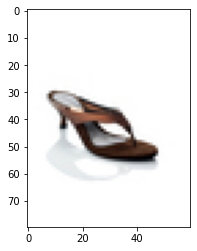

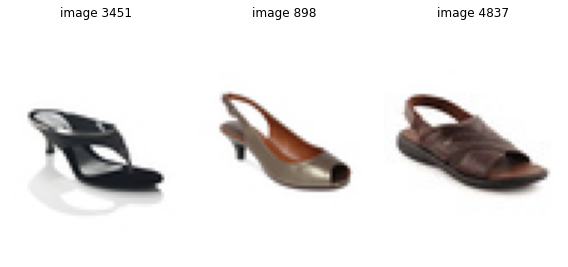

In [3]:
def get_images(indx_image ):
    DATASET_PATH = "e:/dev/Kaggle/fashion/"
    df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=8000, error_bad_lines=False)
    df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
    df = df.reset_index(drop=True)
    
    idx_rec, indx_sim = get_recommender(indx_image, df, max_rec = 3)
    #plot first 3 recommendations
    plt.imshow(cv2.cvtColor(load_image(DATASET_PATH,df.iloc[indx_image].image), cv2.COLOR_BGR2RGB))
    figures = {'image '+str(i): load_image(DATASET_PATH,row.image) for i, row in df.loc[idx_rec].iterrows()}
    str1=""
    plot_images(figures, 1, 3)
    
    return  indx_sim

recommendations = get_images( 2905)

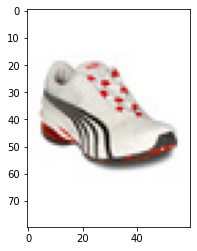

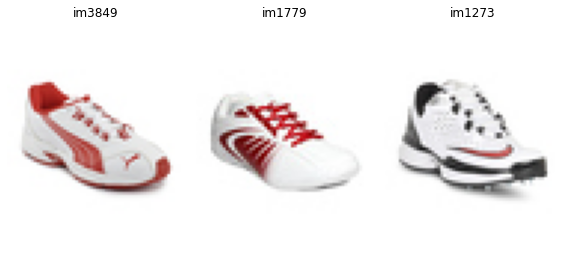

In [5]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, max_rec = 3)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(DATASET_PATH,df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(DATASET_PATH,row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_images(figures, 1, 3)